### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as sm

warnings.simplefilter(action='ignore', category=FutureWarning)


### **Data Processing**

In [2]:
df = pd.read_csv('Crop_Dataset.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175,1712.196283,5.317804,wheat,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184,1748.595734,5.427834,wheat,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159,1893.744627,5.579595,wheat,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149,2123.482908,5.496611,wheat,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162,1642.720357,5.574878,wheat,0


In [3]:
unique_Labels = df['Label'].unique()
print(len(unique_Labels))

22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N                     2200 non-null   int64  
 1   P                     2200 non-null   int64  
 2   K                     2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   humidity              2200 non-null   float64
 5   ph                    2200 non-null   float64
 6   rainfall              2200 non-null   float64
 7   Total_Nutrients       2200 non-null   int64  
 8   Temperature_Humidity  2200 non-null   float64
 9   Log_Rainfall          2200 non-null   float64
 10  Label                 2200 non-null   object 
 11  Label_Encoded         2200 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 206.4+ KB


In [5]:
df['Label'].unique()

array(['wheat', 'barley', 'lettuce', 'spinach', 'cauliflower',
       'brussels_sprouts', 'cabbage', 'beans', 'peas', 'turnips',
       'carrots', 'beets', 'cherries', 'plums', 'raspberries', 'pears',
       'blackcurrants', 'strawberries', 'apples', 'potatoes', 'rapeseed',
       'tomatoes'], dtype=object)

## **EDA**

#### **Check for Missing Values**

In [6]:
df.isna().sum()

N                       0
P                       0
K                       0
temperature             0
humidity                0
ph                      0
rainfall                0
Total_Nutrients         0
Temperature_Humidity    0
Log_Rainfall            0
Label                   0
Label_Encoded           0
dtype: int64

In [7]:
df.describe().round(2)

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label_Encoded
count,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00
mean,50.55,53.36,48.15,25.62,71.48,6.47,103.46,152.06,1854.23,4.51,10.50
std,36.92,32.99,50.65,5.06,22.26,0.77,54.96,79.92,699.37,0.55,6.35
min,0.00,5.00,5.00,8.83,14.26,3.50,20.21,17.00,247.61,3.05,0.00
25%,21.00,28.00,20.00,22.77,60.26,5.97,64.55,94.00,1479.56,4.18,5.00
50%,37.00,51.00,32.00,25.60,80.47,6.43,94.87,146.00,1927.88,4.56,10.50
75%,84.25,68.00,49.00,28.56,89.95,6.92,124.27,179.00,2255.75,4.83,16.00
max,140.00,145.00,205.00,43.68,99.98,9.94,298.56,385.00,4073.16,5.70,21.00


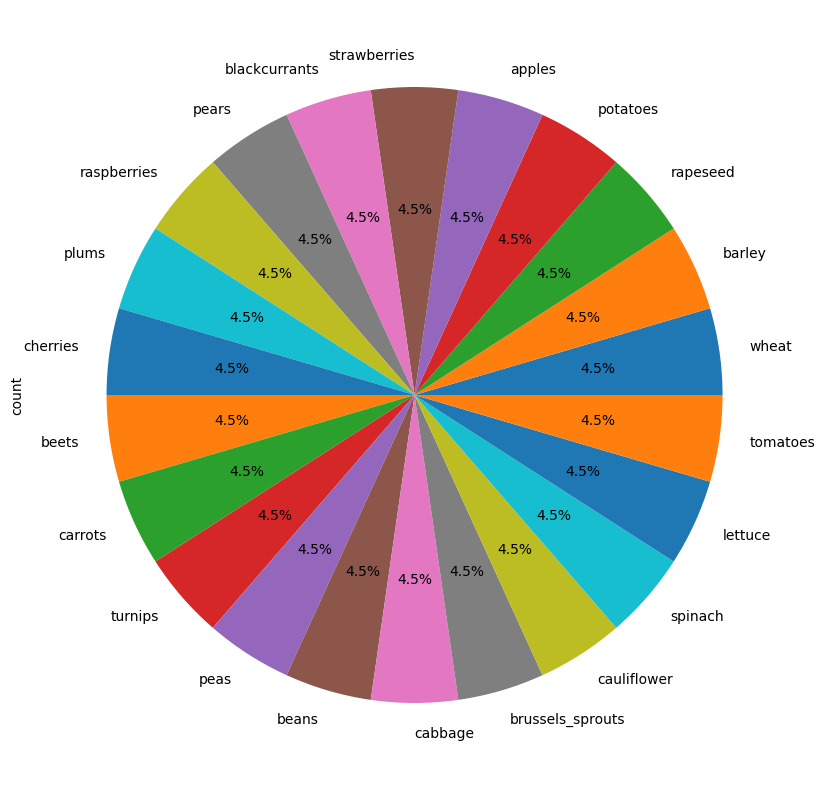

In [8]:
plt.figure(figsize=(10,10))
df['Label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

### **Select Raw features**

drops the engineered columns of Temperature_Humidity,Log_Rainfall	

In [9]:
df = df[["K", 'P', 'N', 'temperature', 'humidity', 'ph', 'rainfall', 'Label', 'Label_Encoded']]

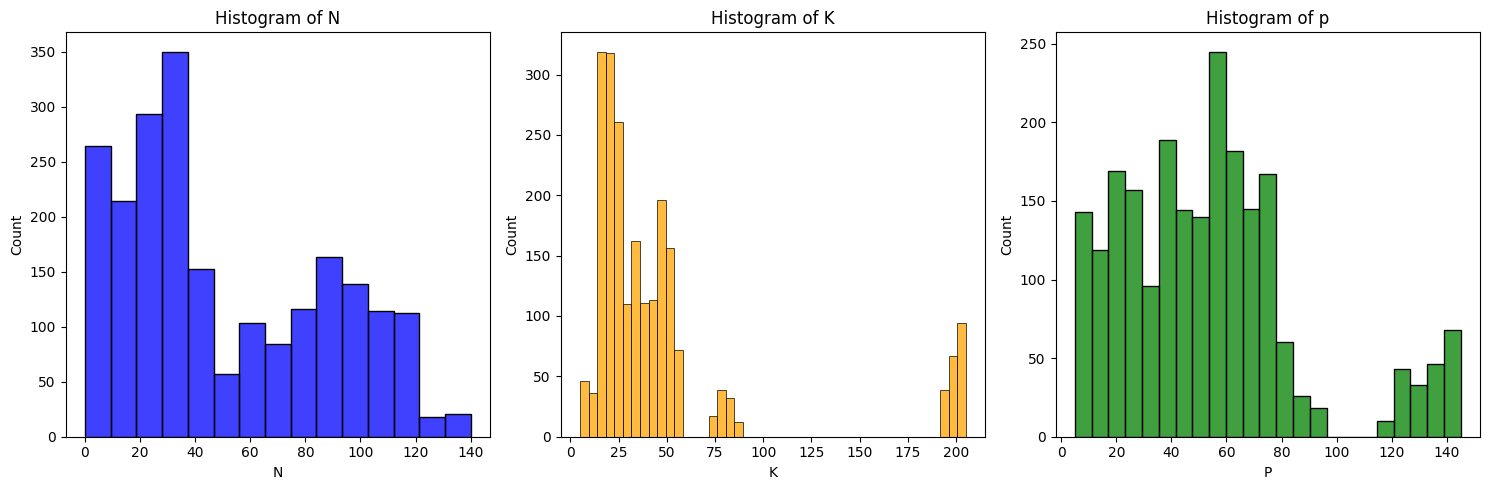

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.histplot(df['N'], ax=axes[0], color='blue')
axes[0].set_title('Histogram of N')

sns.histplot(df['K'], ax=axes[1], color='orange')
axes[1].set_title('Histogram of K')

sns.histplot(df['P'], ax=axes[2], color='green')
axes[2].set_title('Histogram of p')

plt.tight_layout()
plt.show()


### **Check for outliers**

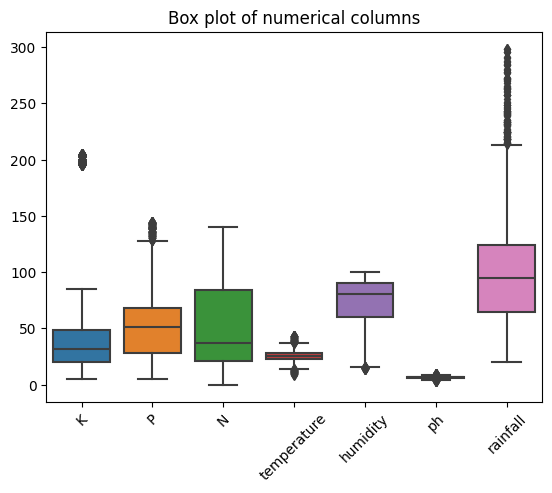

In [11]:
sns.boxplot(data=df[["K",'P','N','temperature','humidity','ph','rainfall']])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Box plot of numerical columns')
plt.show()

### **KDE Plot**

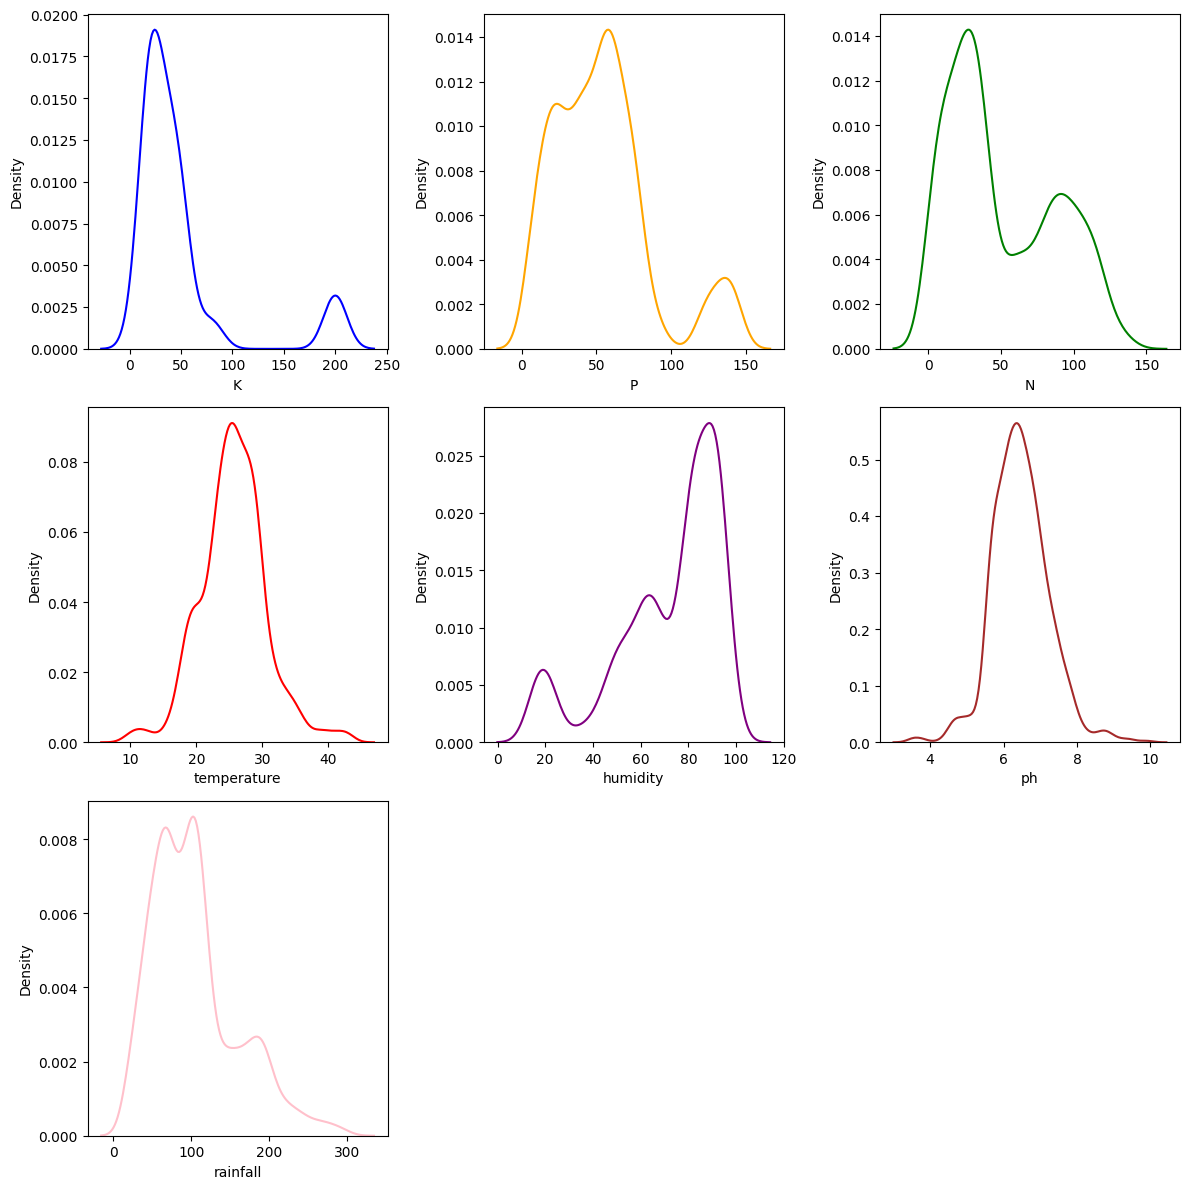

In [12]:
plt.figure(figsize=(12,12))
i=1

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'] 

for col, color in zip(df.iloc[:,:-2], colors):
    plt.subplot(3,3,i)
    sns.kdeplot(df[col], color=color)
    i += 1

plt.tight_layout()
plt.show()

### **Skewness**

In [13]:
df.iloc[:,:-2].skew()

K              2.375167
P              1.010773
N              0.509721
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

### **Corralations**

#### **Corraltions with all Factors**

In [14]:
correlation_coefficients = df[["K", 'P', 'N', 'temperature', 'humidity', 'ph', 'rainfall', 'Label_Encoded']].corr()['Label_Encoded'].drop('Label_Encoded')

print("Correlation of 'Label_Encoded' with other columns:")
print(correlation_coefficients)


Correlation of 'Label_Encoded' with other columns:
K              0.143703
P             -0.167951
N              0.282787
temperature    0.180571
humidity       0.524452
ph             0.052389
rainfall       0.121486
Name: Label_Encoded, dtype: float64


### **VIF (Variance Inflation Factor)**

#### **VIF with all factors**

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['K', 'P', 'N', 'temperature', 'humidity', 'ph', 'rainfall']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

       feature        VIF
0            K   5.324539
1            P   9.068963
2            N   3.144079
3  temperature  23.414779
4     humidity  15.070983
5           ph  26.066956
6     rainfall   4.373791


#### **Check corralations between same domain**

In [16]:
correlation = df["humidity"].corr(df["rainfall"])
print("Correlation between", "humidity ", "and", "rainfall", "is:", round(correlation, 2))

Correlation between humidity  and rainfall is: 0.09


In [17]:
correlation = df["humidity"].corr(df["temperature"])
print("Correlation between", "humidity ", "and", "temperature", "is:", round(correlation, 2))

Correlation between humidity  and temperature is: 0.21


In [18]:
correlation = df["rainfall"].corr(df["temperature"])
print("Correlation between", "temperature ", "and", "rainfall", "is:", round(correlation, 2))

Correlation between temperature  and rainfall is: -0.03


## **Data Preprocess**

### **Unseen Data Split**

This data use to evaluate loaded model

In [19]:
new_conditional_data = df.sample(5, random_state=42)
df = df.drop(new_conditional_data.index)

df.shape

(2195, 9)

### **Train test split**

In [20]:
from sklearn.model_selection import train_test_split

if 'Label_Encoded' not in df.columns:
    print("Error: 'Label_Encoded' column does not exist in the DataFrame.")
else:
    train_data = []
    test_data = []

    # Group the data by 'Label_Encoded' column
    grouped_data = df.groupby('Label_Encoded')

    for label, group in grouped_data:
        train_group, test_group = train_test_split(group, test_size=0.2, random_state=42)
        train_data.append(train_group)
        test_data.append(test_group)

    train_data = pd.concat(train_data)
    test_data = pd.concat(test_data)

    print("Training Data Shape:", train_data.shape)
    print("Testing Data Shape:", test_data.shape)


Training Data Shape: (1755, 9)
Testing Data Shape: (440, 9)


In [21]:
test_data.head()

,K,P,N,temperature,humidity,ph,rainfall,Label,Label_Encoded
83,39,43,67,26.043720,84.969072,5.999969,186.753677,wheat,0
53,43,60,65,21.971994,81.899182,5.658169,227.363701,wheat,0
70,41,52,61,24.976695,83.891805,6.880431,204.800185,wheat,0
45,38,35,91,24.897282,80.525861,6.134287,183.679321,wheat,0
44,45,52,85,26.313555,82.366990,7.224286,265.535594,wheat,0


In [22]:
X_train = train_data[['K', 'P', 'N', 'temperature', 'humidity', 'ph', 'rainfall']]
y_train = train_data['Label_Encoded']

X_test = test_data[['K', 'P', 'N', 'temperature', 'humidity', 'ph', 'rainfall']]
y_test = test_data['Label_Encoded']

## **Model Building**

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [24]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

### **Evaluating Model**

#### **Base Model On test Data**

In [25]:
y_pred = svc_model.predict(X_test)
print("Classification Report of Base Model:\n",classification_report(y_test,y_pred))

Classification Report of Base Model:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       0.91      1.00      0.95        20
           4       1.00      0.85      0.92        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       0.95      1.00      0.98        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00

#### **Use Boosting**

In [26]:
from sklearn.ensemble import AdaBoostClassifier

base_classifier = SVC(probability=True)
boosted_model = AdaBoostClassifier(base_estimator=base_classifier)

boosted_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=SVC(probability=True))

In [27]:
y_pred = boosted_model.predict(X_test)
print("Classification Report of Bagging Model:\n",classification_report(y_test,y_pred))

Classification Report of Bagging Model:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        20
           1       1.00      0.90      0.95        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      0.95      0.97        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1

### **Joblib Model Creaton and Predicton**

In [28]:
import joblib

joblib.dump(boosted_model, 'svc_ab_model.joblib')

['svc_ab_model.joblib']

#### **Load Model**

In [29]:
loded_model = joblib.load('svc_ab_model.joblib')

print("Model loaded successfully.")

new_conditional_data.shape

Model loaded successfully.


(5, 9)

#### **Preprocess Data**

In [30]:
new_conditions = new_conditional_data[['K', 'P', 'N', 'temperature', 'humidity', 'ph', 'rainfall']]
new_labels = new_conditional_data['Label_Encoded']


#### **Predict**

In [31]:
y_pred = loded_model.predict(new_conditions)

#### **Evaluate Model**

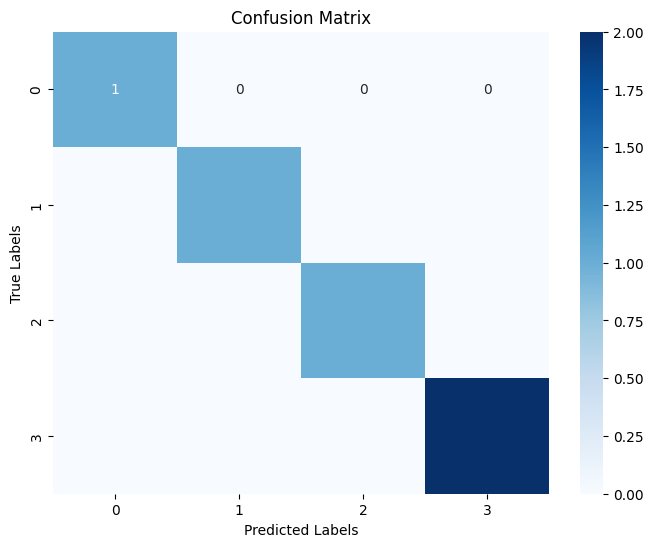

In [32]:
conf_matrix = confusion_matrix(new_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### **Recommend Top 3 Crops**

In [33]:
predicted_proba = loded_model.predict_proba(new_conditions)

best_3_predictions = predicted_proba.argsort(axis=1)[:, -3:]

unique_labels = df['Label'].unique()

predicted_labels = [[unique_labels[idx] for idx in row] for row in best_3_predictions]

top_3_probabilities = np.sort(predicted_proba, axis=1)[:, -3:]


top_3_probabilities = np.round(top_3_probabilities, 2)


for i, (predicted, probs, actual) in enumerate(zip(predicted_labels, top_3_probabilities, new_labels)):
    print(f"Sample {i + 1}:")
    print("Recommended Crops:", np.flip(predicted))
    print("Probabilities:", np.flip(probs))
    print("-------------------------------------------------")

Sample 1:
Recommended Crops: ['raspberries' 'plums' 'potatoes']
Probabilities: [0.1  0.09 0.07]
-------------------------------------------------
Sample 2:
Recommended Crops: ['plums' 'raspberries' 'potatoes']
Probabilities: [0.1  0.08 0.07]
-------------------------------------------------
Sample 3:
Recommended Crops: ['strawberries' 'tomatoes' 'carrots']
Probabilities: [0.1  0.06 0.06]
-------------------------------------------------
Sample 4:
Recommended Crops: ['strawberries' 'turnips' 'cauliflower']
Probabilities: [0.09 0.06 0.06]
-------------------------------------------------
Sample 5:
Recommended Crops: ['pears' 'cherries' 'raspberries']
Probabilities: [0.1  0.08 0.06]
-------------------------------------------------


### **Prediction algorithm**

after first run of notebook use following to cells to reproduce the code

In [34]:
def prediction_algorith(df):
    loded_model = joblib.load('svc_gb_model.joblib')
    selecetd_data = df[['K', 'P', 'N', 'temperature', 'humidity', 'ph', 'rainfall']]
    unique_labels = ['wheat', 'barley', 'lettuce', 'spinach', 'cauliflower','brussels_sprouts', 'cabbage', 'beans', 'peas', 'turnips','carrots', 'beets', 'cherries', 'plums', 'raspberries', 'pears','blackcurrants', 'strawberries', 'apples', 'potatoes', 'rapeseed','tomatoes']

    predicted_proba = loded_model.predict_proba(selecetd_data)
    best_3_predictions = predicted_proba.argsort(axis=1)[:, -3:]
    predicted_labels = [[unique_labels[idx] for idx in row] for row in best_3_predictions]
    top_3_probabilities = np.sort(predicted_proba, axis=1)[:, -3:]
    top_3_probabilities = np.round(top_3_probabilities, 2)

    print("Predictions:")
    for i, (predicted, probs) in enumerate(zip(predicted_labels, top_3_probabilities)):
        print(f"Sample {i + 1}:")
        print("Recommended Crops:", np.flip(predicted))
        print("Probabilities:", np.flip(probs))
        print("-------------------------------------------------")

In [35]:
import numpy as np
import pandas as pd
import joblib

df = pd.read_csv('Crop_Dataset.csv')
df = df.head(5)

prediction_algorith(df)

Predictions:
Sample 1:
Recommended Crops: ['wheat' 'rapeseed' 'tomatoes']
Probabilities: [0.08 0.07 0.06]
-------------------------------------------------
Sample 2:
Recommended Crops: ['wheat' 'rapeseed' 'spinach']
Probabilities: [0.08 0.06 0.05]
-------------------------------------------------
Sample 3:
Recommended Crops: ['wheat' 'rapeseed' 'spinach']
Probabilities: [0.08 0.06 0.05]
-------------------------------------------------
Sample 4:
Recommended Crops: ['wheat' 'rapeseed' 'spinach']
Probabilities: [0.08 0.06 0.05]
-------------------------------------------------
Sample 5:
Recommended Crops: ['wheat' 'rapeseed' 'spinach']
Probabilities: [0.08 0.06 0.05]
-------------------------------------------------
